# Reading Zarr Datasets from S3 Storage

In [3]:
import s3fs

In [4]:
s3 = s3fs.S3FileSystem(anon=False)

In [5]:
s3.ls("s3://veda-data-store-staging/EIS/zarr/")

['veda-data-store-staging/EIS/zarr/.zgroup',
 'veda-data-store-staging/EIS/zarr/FWI.GEOS-5.zarr',
 'veda-data-store-staging/EIS/zarr/FWI_GPM_LATE_v5_Daily.zarr',
 'veda-data-store-staging/EIS/zarr/GEOS5_FWI_GPM_LATE_v5_Daily.zarr',
 'veda-data-store-staging/EIS/zarr/OCO2_GEOS_L3CO2_day.zarr',
 'veda-data-store-staging/EIS/zarr/SPL3SMP.zarr']

------

In [2]:
import xarray as xr

In [13]:
fwi_geos5 = xr.open_dataset("s3://veda-data-store-staging/EIS/zarr/FWI.GEOS-5.zarr")

In [14]:
fwi_geos5

<xarray.Dataset>
Dimensions:      (forecast: 9, time: 2200, lat: 533, lon: 1152)
Coordinates:
  * forecast     (forecast) int64 0 1 2 3 4 5 6 7 8
  * lat          (lat) float64 -58.0 -57.75 -57.5 -57.25 ... 74.5 74.75 75.0
  * lon          (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
  * time         (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2023-01-29
Data variables:
    GEOS-5_BUI   (forecast, time, lat, lon) float32 ...
    GEOS-5_DC    (forecast, time, lat, lon) float32 ...
    GEOS-5_DMC   (forecast, time, lat, lon) float32 ...
    GEOS-5_DSR   (forecast, time, lat, lon) float32 ...
    GEOS-5_FFMC  (forecast, time, lat, lon) float32 ...
    GEOS-5_FWI   (forecast, time, lat, lon) float32 ...
    GEOS-5_ISI   (forecast, time, lat, lon) float32 ...

In [15]:
fwi_sub = fwi_geos5.sel(forecast=0, lat=38.5, lon=-84.5, method="nearest")

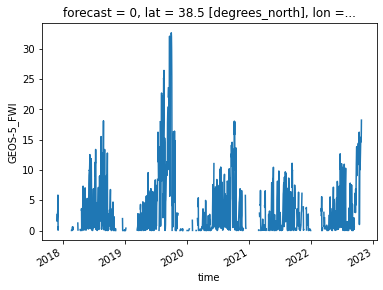

In [16]:
fwi_sub["GEOS-5_FWI"].plot()

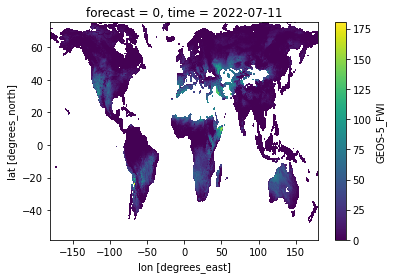

In [18]:
fwi_geos5["GEOS-5_FWI"].sel(forecast=0, time="2022-07-11").plot()

----

In [19]:
smap = xr.open_dataset("s3://veda-data-store-staging/EIS/zarr/SPL3SMP.zarr")

In [20]:
smap

<xarray.Dataset>
Dimensions:                        (northing_m: 406, easting_m: 964, datetime: 1679)
Coordinates:
  * datetime                       (datetime) datetime64[ns] 2018-01-01 ... 2...
  * easting_m                      (easting_m) float64 -1.735e+07 ... 1.735e+07
  * northing_m                     (northing_m) float64 7.297e+06 ... -7.297e+06
Data variables: (12/26)
    albedo                         (northing_m, easting_m, datetime) float32 ...
    albedo_pm                      (northing_m, easting_m, datetime) float32 ...
    bulk_density                   (northing_m, easting_m, datetime) float32 ...
    bulk_density_pm                (northing_m, easting_m, datetime) float32 ...
    clay_fraction                  (northing_m, easting_m, datetime) float32 ...
    clay_fraction_pm               (northing_m, easting_m, datetime) float32 ...
    ...                             ...
    static_water_body_fraction     (northing_m, easting_m, datetime) float32 ...
    static_water_body_fraction_pm  (northing_m, easting_m, datetime) float32 ...
    surface_flag                   (northing_m, easting_m, datetime) float32 ...
    surface_flag_pm                (northing_m, easting_m, datetime) float32 ...
    surface_temperature            (northing_m, easting_m, datetime) float32 ...
    surface_temperature_pm         (northing_m, easting_m, datetime) float32 ...

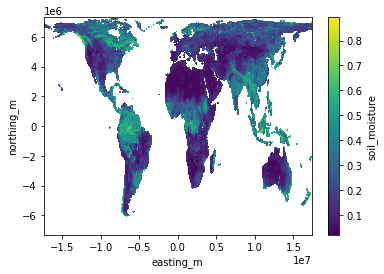

In [26]:
smap.sel(datetime="2022-07").mean("datetime").soil_moisture.plot()